# Importação dos dados e verificação das colunas existentes no DataFrame.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_table(f'../data/DADOS/DADOS_INEP_ENEM.csv', low_memory=False, sep=',')

C:\Users\hugop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


Para fazer com que apareçam apenas os Institutos Federais nós fazemos uma amostra dos dados.

In [3]:
df = df[df["NO_ESCOLA_EDUCACENSO"] == "IF"]

In [4]:
df.columns

Index(['Unnamed: 0', 'NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA',
       'CO_MUNICIPIO_ESCOLA', 'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO',
       'NO_ESCOLA_EDUCACENSO', 'TP_DEPENDENCIA_ADM_ESCOLA',
       'TP_LOCALIZACAO_ESCOLA', 'NU_MATRICULAS', 'NU_PARTICIPANTES_NEC_ESP',
       'NU_PARTICIPANTES', 'NU_TAXA_PARTICIPACAO', 'NU_MEDIA_CN',
       'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED',
       'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE', 'PC_FORMACAO_DOCENTE',
       'NU_TAXA_PERMANENCIA', 'NU_TAXA_APROVACAO', 'NU_TAXA_REPROVACAO',
       'NU_TAXA_ABANDONO', 'PORTE_ESCOLA'],
      dtype='object')

### Qual a média da nota no ENEM por Estados?

O INEP chama cada parte do ENEM de área. As áreas são:
- Ciências da Natureza (NU_MEDIA_CN);
- Ciências Humanas (NU_MEDIA_CH);
- Lnguagens e Códigos (NU_MEDIA_LP);
- Matemática (NU_MEDIA_MT);
- Redação (NU_MEDIA_RED);

Primeiramente pegamos as tabelas que contém as informações que queremos, ou seja, as tabelas de cada área do ENEM.

In [5]:
dfEst = df[['SG_UF_ESCOLA','NU_MEDIA_CN','NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED']]

Agora agrupamos esses dados baseados nos Estados e fazemos a média desses valores.

In [6]:
dfEst = dfEst.groupby('SG_UF_ESCOLA')
dfEst = dfEst.mean()

Fazemos por fim uma nova coluna de dados que contenha as médias de cada área por estado.

Após isso a gente criou uma nova tabela para pegar a média total pegando a média das médias de cada discplina.

In [7]:
dfEst['NU_MEDIA_TOTAL'] = dfEst.mean(axis=1)

E agora com a função iloc a gente seleciona apenas a coluna que queremos.

In [8]:
dfEstFin = dfEst.iloc[:,5:]
dfEstFin

,NU_MEDIA_TOTAL
SG_UF_ESCOLA,
AC,496.277500
AL,543.033415
AM,508.143650
AP,540.784000
BA,565.068947
CE,535.072462
DF,520.334667
ES,599.630294
GO,562.812931


Vamos fazer um gráfico para ter um apanhado geral sobre esses dados.

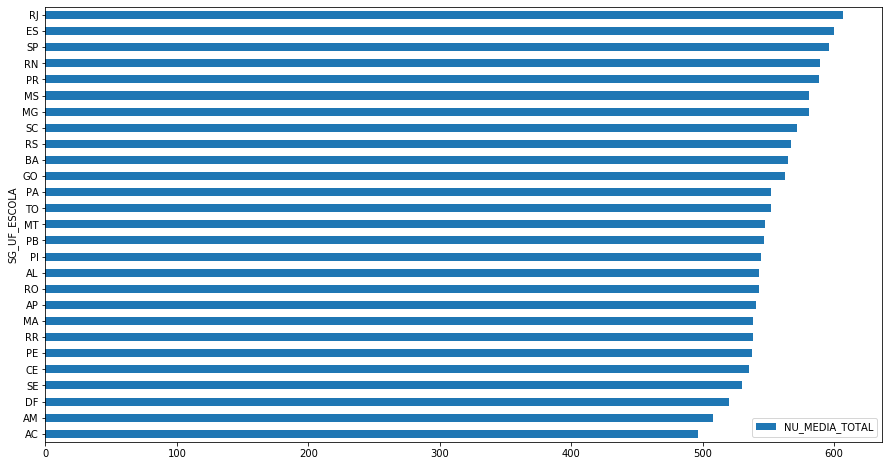

In [9]:
dfEstFin.sort_values(['NU_MEDIA_TOTAL']).plot.barh(figsize=(15,8))

Baseado nisso nós podemos concluir que o Estado em que o IF possui a maior nota geral no ENEM é o RJ, já o AC fica como a menor média entre eles.

### Qual a média por "disciplina" do ENEM?

Nesse quesito, nós pegamos as tabelas que nos interessam (as tabelas por cada disciplina e a tabela dos IFs).

In [10]:
IFs = df[['NU_MEDIA_CN','NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED','NO_ESCOLA_EDUCACENSO']]

Após isso agrupamos pelos IF e já tiramos a média.

In [11]:
IFMed = IFs.groupby("NO_ESCOLA_EDUCACENSO").mean()
IFMed

,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED
NO_ESCOLA_EDUCACENSO,,,,,
IF,527.727729,577.695641,543.344524,563.730183,599.971319


In [12]:
coeVar = (IFMed.std(axis=1)/IFMed.mean(axis=1))*100
coeVar

NO_ESCOLA_EDUCACENSO
IF    5.038231
dtype: float64

O IF possui uma nota geral mais baixa em ciências da natureza, porém em redação ele sobe a nota. E com um coeficiente de variação de aproximadamente 5%, ou seja, com pouquíssima variação entre suas notas.

### Qual o desvio padrão das médias totais de cada municipio?

Nesta parte agrupamos as notas em função dos municipios e calculamos e media total de cada municipio.

In [13]:
dfMun = df[['NO_MUNICIPIO_ESCOLA','NU_MEDIA_CN','NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED']]

dfMun = dfMun.groupby('NO_MUNICIPIO_ESCOLA')

dfMun = dfMun.mean()

Aqui calculamos o desvio padrão médio de todas as médias.

In [14]:
dP = dfMun.mean(axis=1).std()
dP

39.22724618944959

Mas o que esse valor significa? Bem, o desvio padrão serve para calcular o desvio das notas em torno da média. Com isso, temos que há um desvio de aproximadamente 39 pontos em torno da média.

### Existem outliers nos dados?

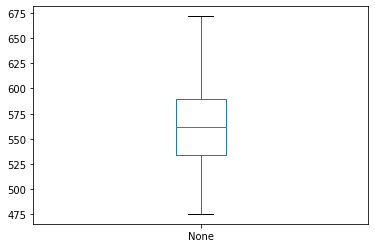

In [15]:
dfMun.mean(axis=1).plot.box()

Baseado no boxplot a resposta é não.

Porém isso mostra mais do que parece. O fato de não haver valores discrepantes no conjunto de dados mostra uma padronização nas notas dos Institutos Federais, o que é bom, mostrando que o ensino segue um padrão em diferentes Campus em torno do país.

Ao olharmos o boxplot, vemos também que não há tanta variação nas notas. Elas se mantém em torno de 530 até 580 no ENEM, mantendo o discurso de que é um ensino mais padronizado.

Outra informação interessante é o fato do mesmo estar um pouco para baixo do centro. Quando isso ocorre dizemos que há uma leve assimetria a esquerda.